In [1]:
import mlflow
import os
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt 

/Users/matthiasherp/anaconda3/envs/mctm_pytorch/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Demo on how to analyse MLFlow Stored Experiments

1. Below we move to the root of the project where the mlruns folder is. There we can then call experiment wise run data. MLFlow allows us to look at tags, parameters as well as metrics in a pandas dataframe and hence create plots across runs. See minimal example below.

2. All Tags, Parameters, Metrics and Artifacts (Every Datatype, manely Plots and the Model) can also be viewed using the MLFlow User Interface which is a server you run locally. Simply open a new terminal and run "mlflow ui", then the server runs in that terminal and you can see it in the browser under "http://127.0.0.1:5000" (can be changed by a comand). Server can be closed by closing the terminal and running "pkill -f mlflow" in another terminal.

3. The only annoying thing about mlflow is that is uses absolute instead of relative paths. This means that if you want to analyze results created on another machine (server or another person) then it does not work. However I have coded a workaround that patches the paths. To solve this simply run the python script "/simulation_studies/mlflow_change_mlflow_artifact_directiories.py" in a terminal.


In [2]:
# move to project root directory to find the mlruns folder with mlflow experiments
notebook_path = Path().resolve()
project_root = notebook_path.parent  # adjust as needed
os.chdir(project_root)

In [3]:
experiment_name = "rine_5D_1000obs"
experiment = mlflow.get_experiment_by_name(experiment_name) 
df_runs = mlflow.search_runs([experiment.experiment_id])

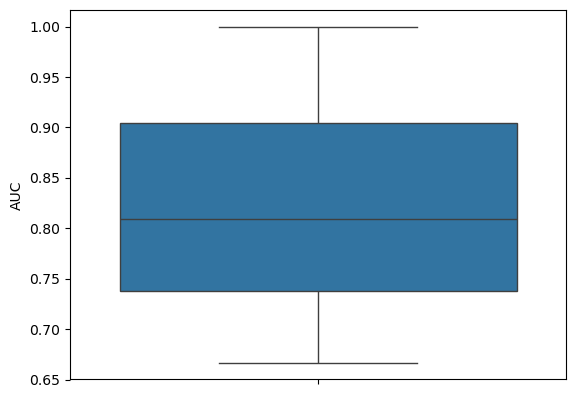

In [4]:
sns.boxplot(data=df_runs, y="metrics.auc_iae")
plt.ylabel("AUC")
plt.show()